In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense

In [70]:
betb011_22 = pd.read_excel("BE_7_42647_2022_timeseries.xlsx")
betb011_23 = pd.read_excel("BE_7_42647_2023_timeseries.xlsx")

betr012_22 = pd.read_excel("BE_7_42119_2022_timeseries.xlsx")
betr012_23 = pd.read_excel("BE_7_42119_2023_timeseries.xlsx")

betb004_22 = pd.read_excel("BE_7_42253_2022_timeseries.xlsx")
betb004_23 = pd.read_excel("BE_7_42253_2023_timeseries.xlsx")

betr001_22 = pd.read_excel("BE_7_41247_2022_timeseries.xlsx")
betr001_23 = pd.read_excel("BE_7_41247_2023_timeseries.xlsx")

betmeu1_22 = pd.read_excel("BE_7_61521_2022_timeseries.xlsx")
betmeu1_23 = pd.read_excel("BE_7_61521_2023_timeseries.xlsx")

In [71]:
betb011 = pd.concat([betb011_22,betb011_23])
betr012 = pd.concat([betr012_22,betr012_23])
betb004 = pd.concat([betb004_22,betb004_23])
betr001 = pd.concat([betr001_22,betr001_23])
betmeu1 = pd.concat([betmeu1_22,betmeu1_23])

In [72]:
columns_remove = ['AirQualityStation','Countrycode','Namespace','AirQualityNetwork','SamplingProcess','SamplingPoint','Sample','AirPollutantCode','AveragingTime','UnitOfMeasurement','Validity','Verification']
betb011 = betb011.drop(columns=columns_remove)
betr012 = betr012.drop(columns=columns_remove)
betb004 = betb004.drop(columns=columns_remove)
betr001 = betr001.drop(columns=columns_remove)
betmeu1 = betmeu1.drop(columns=columns_remove)

In [73]:
betb011_ori = betb011.copy()
betr012_ori = betr012.copy()
betb004_ori = betb004.copy()
betr001_ori = betr001.copy()
betmeu1_ori = betmeu1.copy()

In [74]:
betb011_ori2 = betb011.copy()
betb011_nn = betb011.copy()

In [75]:
# List of datasets
datasets = [betb011_ori, betr012_ori, betb004_ori, betr001_ori, betmeu1_ori]

# Apply the transformation to each dataset
for data in datasets:
    data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'].str.replace(r' [+-]\d{2}:\d{2}', ''), format='%Y-%m-%d %H:%M:%S')
    data['DatetimeEnd'] = pd.to_datetime(data['DatetimeEnd'].str.replace(r' [+-]\d{2}:\d{2}', ''), format='%Y-%m-%d %H:%M:%S')

C:\Users\bro_1\AppData\Local\Temp\ipykernel_7164\2765411853.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'].str.replace(r' [+-]\d{2}:\d{2}', ''), format='%Y-%m-%d %H:%M:%S')
C:\Users\bro_1\AppData\Local\Temp\ipykernel_7164\2765411853.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['DatetimeEnd'] = pd.to_datetime(data['DatetimeEnd'].str.replace(r' [+-]\d{2}:\d{2}', ''), format='%Y-%m-%d %H:%M:%S')
C:\Users\bro_1\AppData\Local\Temp\ipykernel_7164\2765411853.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'].str.replace(r' [+-]\d{2}:\d{2}', ''), format='%Y-%m-%d %H:%M:%S')
C:\Users\bro_1\AppData\Local\Temp\ipykernel_7164\2765411853.py:7: FutureWarning: The default value of regex will change from True to Fals

In [76]:
# Apply the transformations to each dataset
for data in datasets:
    data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'])
    data = data.sort_values(by='DatetimeBegin')

# Now we preprocess. Remove variables we dont need and make new variables such as weekend or not and add days of the week

In [77]:
columns_to_remove = ['AirQualityStationEoICode', 'AirPollutant']
data = data.drop(columns=columns_to_remove)
data.head()

,Concentration,DatetimeBegin,DatetimeEnd
0,34.0,2022-01-01 01:00:00,2022-01-01 02:00:00
1,36.5,2022-01-01 02:00:00,2022-01-01 03:00:00
2,37.0,2022-01-01 03:00:00,2022-01-01 04:00:00
3,35.0,2022-01-01 04:00:00,2022-01-01 05:00:00
4,33.0,2022-01-01 05:00:00,2022-01-01 06:00:00


In [78]:
# Convert 'DatetimeBegin' and 'DatetimeEnd' columns to datetime objects
data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'])
data['DatetimeEnd'] = pd.to_datetime(data['DatetimeEnd'])

# Extract year, month, day, and time into separate columns
data['Year'] = data['DatetimeBegin'].dt.year
data['Month'] = data['DatetimeBegin'].dt.month
data['Day'] = data['DatetimeBegin'].dt.day
data['Time'] = data['DatetimeBegin'].dt.time

# Display the transformed DataFrame
print(data.head())

   Concentration       DatetimeBegin         DatetimeEnd  Year  Month  Day  \
0           34.0 2022-01-01 01:00:00 2022-01-01 02:00:00  2022      1    1   
1           36.5 2022-01-01 02:00:00 2022-01-01 03:00:00  2022      1    1   
2           37.0 2022-01-01 03:00:00 2022-01-01 04:00:00  2022      1    1   
3           35.0 2022-01-01 04:00:00 2022-01-01 05:00:00  2022      1    1   
4           33.0 2022-01-01 05:00:00 2022-01-01 06:00:00  2022      1    1   

       Time  
0  01:00:00  
1  02:00:00  
2  03:00:00  
3  04:00:00  
4  05:00:00  


In [79]:
# Convert 'DatetimeBegin' and 'DatetimeEnd' columns to datetime objects
data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'])
data['DatetimeEnd'] = pd.to_datetime(data['DatetimeEnd'])

# Extract day of the week
data['DayOfWeek'] = (data['DatetimeBegin'].dt.weekday + 1) % 7

# Create a new column indicating whether the day is a weekend or not
data['Weekend'] = (data['DatetimeBegin'].dt.dayofweek // 5).astype(int)

In [80]:
data.head()

,Concentration,DatetimeBegin,DatetimeEnd,Year,Month,Day,Time,DayOfWeek,Weekend
0,34.0,2022-01-01 01:00:00,2022-01-01 02:00:00,2022,1,1,01:00:00,6,1
1,36.5,2022-01-01 02:00:00,2022-01-01 03:00:00,2022,1,1,02:00:00,6,1
2,37.0,2022-01-01 03:00:00,2022-01-01 04:00:00,2022,1,1,03:00:00,6,1
3,35.0,2022-01-01 04:00:00,2022-01-01 05:00:00,2022,1,1,04:00:00,6,1
4,33.0,2022-01-01 05:00:00,2022-01-01 06:00:00,2022,1,1,05:00:00,6,1


##### Now we make the data daily

In [81]:
# Convert 'DatetimeBegin' and 'DatetimeEnd' columns to datetime objects
data['DatetimeBegin'] = pd.to_datetime(data['DatetimeBegin'])
data['DatetimeEnd'] = pd.to_datetime(data['DatetimeEnd'])

# Remove the 'Time' column
data.drop(columns=['Time'], inplace=True)

# Group by 'Year', 'Month', and 'Day', and calculate the daily average concentration
data = data.groupby(['Year', 'Month', 'Day']).agg({'Concentration': 'mean', 'DayOfWeek': 'first', 'Weekend': 'first'}).reset_index()

# Display the daily dataset
print(data.head())

   Year  Month  Day  Concentration  DayOfWeek  Weekend
0  2022      1    1      34.826087          6        1
1  2022      1    2      44.717391          0        1
2  2022      1    3      58.812500          1        0
3  2022      1    4      52.604167          2        0
4  2022      1    5      35.173913          3        0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           648 non-null    int64  
 1   Month          648 non-null    int64  
 2   Day            648 non-null    int64  
 3   Concentration  627 non-null    float64
 4   DayOfWeek      648 non-null    int64  
 5   Weekend        648 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 28.0 KB


### Now we make a new variable based on the optimal SARIMA

In [83]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Display the updated DataFrame
print(data.head())

   Year  Month  Day  Concentration  DayOfWeek  Weekend       Date
0  2022      1    1      34.826087          6        1 2022-01-01
1  2022      1    2      44.717391          0        1 2022-01-02
2  2022      1    3      58.812500          1        0 2022-01-03
3  2022      1    4      52.604167          2        0 2022-01-04
4  2022      1    5      35.173913          3        0 2022-01-05


In [84]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)

data.head()

,Year,Month,Day,Concentration,DayOfWeek,Weekend
Date,,,,,,
2022-01-01,2022,1,1,34.826087,6,1
2022-01-02,2022,1,2,44.717391,0,1
2022-01-03,2022,1,3,58.812500,1,0
2022-01-04,2022,1,4,52.604167,2,0
2022-01-05,2022,1,5,35.173913,3,0


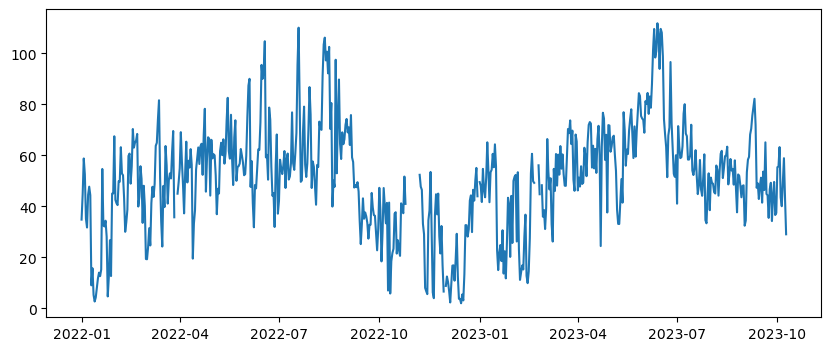

In [85]:
plt.figure(figsize=(10,4))
plt.plot(data.Concentration)

In [86]:
# Drop unnecessary columns
data_a = data[['Concentration']].copy()

# Reset the index to keep it as a regular column
data_a.reset_index(inplace=True)
data_a.set_index('Date', inplace=True)

data_a.head()

,Concentration
Date,
2022-01-01,34.826087
2022-01-02,44.717391
2022-01-03,58.812500
2022-01-04,52.604167
2022-01-05,35.173913


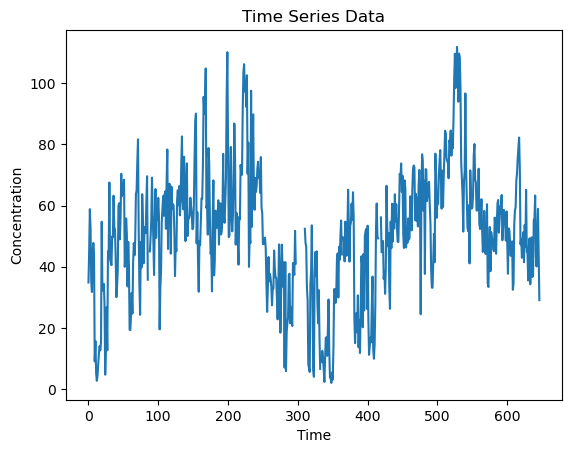

In [87]:
# Extract the 'Concentration' column as a NumPy array
data_b = data['Concentration'].to_numpy()

# Plot the time series data
plt.plot(data_b)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

In [88]:
data_a.dropna(subset=['Concentration'], inplace=True)

In [89]:
print(data_a)

            Concentration
Date                     
2022-01-01      34.826087
2022-01-02      44.717391
2022-01-03      58.812500
2022-01-04      52.604167
2022-01-05      35.173913
...                   ...
2023-10-05      40.086957
2023-10-06      49.565217
2023-10-07      58.916667
2023-10-08      43.130435
2023-10-09      29.065217

[627 rows x 1 columns]


In [90]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data_a)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

ADF Statistic: -4.183112718587053
p-value: 0.0007036380147547563
Critical Values: {'1%': -3.440924132966757, '5%': -2.866205413627313, '10%': -2.5692545786625383}
The time series is likely stationary.


###### We have stationarity

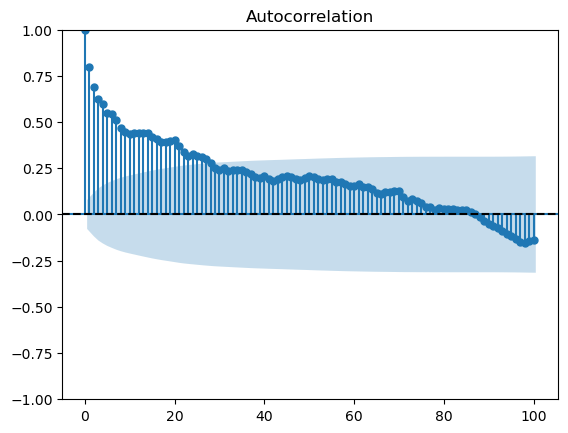

In [91]:
acf_plot = plot_acf(data_a.Concentration, lags=100)
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


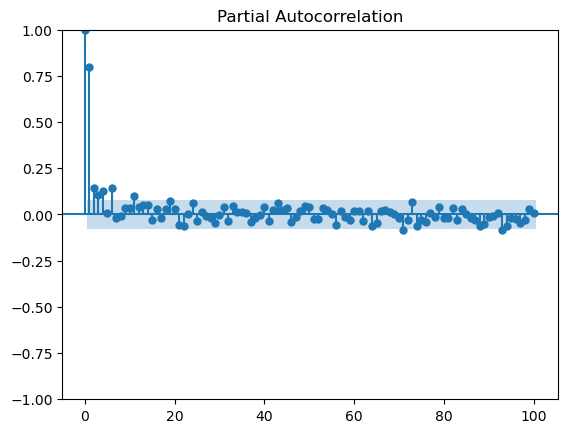

In [92]:
pacf_plot = plot_pacf(data_a.Concentration, lags=100)

In [ ]:
data_a = data['Concentration'].to_numpy()

# Define the range of AR and MA values to check
ar_range = range(10)
ma_range = range(10)

# Initialize variables for tracking the best model
best_aic = float('inf')
best_order = None
best_results = None

# Iterate through AR and MA values
for p in ar_range:
    for q in ma_range:
        order = (p, 0, q)  # ARIMA order (p, d, q), here d=0 for ARMA
        model = sm.tsa.ARIMA(data_a, order=order)
        results = model.fit()

        # Calculate Mean Squared Error (MSE)
        fitted_values = results.fittedvalues
        mse = mean_squared_error(data_a, fitted_values)

        # Check if the current model has a lower AIC than the best so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_results = results

            # Update the best MSE as well
            best_mse = mse

# Display the best model's information including AIC, BIC, MSE, and summary
print(f'Best Model Order: {best_order}')
print(f'Best Model AIC: {best_aic:.2f}')
print(f'Best Model BIC: {best_results.bic:.2f}')
print(f'Best Model MSE: {best_mse:.2f}')
print(best_results.summary())

#### We confirm ARIMA(6, 0, 5) is our best model. Now we got those values

In [93]:
# Fit ARMA(6, 0, 5) model
order_arma = (6, 0, 5)  # ARIMA order (p, d, q), here d=0 for ARMA
model_arma = sm.tsa.ARIMA(data_a['Concentration'], order=order_arma)
results_arma = model_arma.fit()

# Extract the predicted (fitted) values
fitted_values = pd.DataFrame({
    'FittedValues': results_arma.fittedvalues
})

# Combine the original data_a DataFrame with the fitted values
data['FittedValues'] = fitted_values['FittedValues']

# Display the updated DataFrame
print(data)

C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues
Date                                                                         
2022-01-01  2022      1    1      34.826087          6        1     50.943430
2022-01-02  2022      1    2      44.717391          0        1     37.898076
2022-01-03  2022      1    3      58.812500          1        0     44.426841
2022-01-04  2022      1    4      52.604167          2        0     54.633318
2022-01-05  2022      1    5      35.173913          3        0     50.968446
...          ...    ...  ...            ...        ...      ...           ...
2023-10-06  2023     10    6      49.565217          5        0     43.048204
2023-10-07  2023     10    7      58.916667          6        1     49.826700
2023-10-08  2023     10    8      43.130435          0        1     56.425910
2023-10-09  2023     10    9      29.065217          1        0     46.711346
2023-10-10  2023     10   10            NaN          2        0 

C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


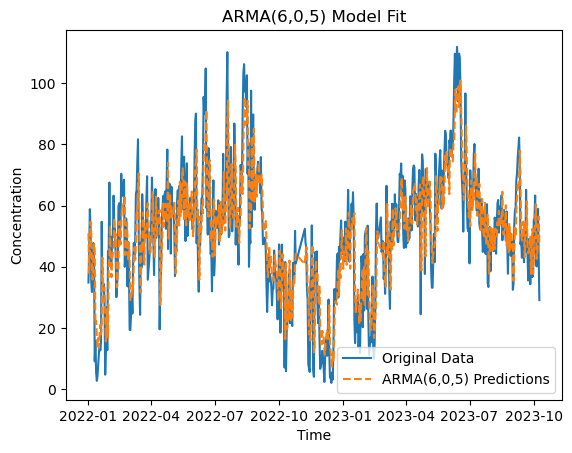

In [94]:
# Plot original data and predicted values
plt.plot(data_a, label='Original Data')
plt.plot(results_arma.fittedvalues, label='ARMA(6,0,5) Predictions', linestyle='--')
plt.title('ARMA(6,0,5) Model Fit')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

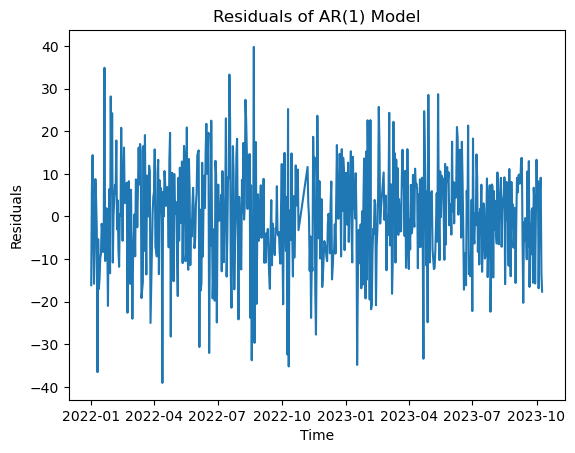

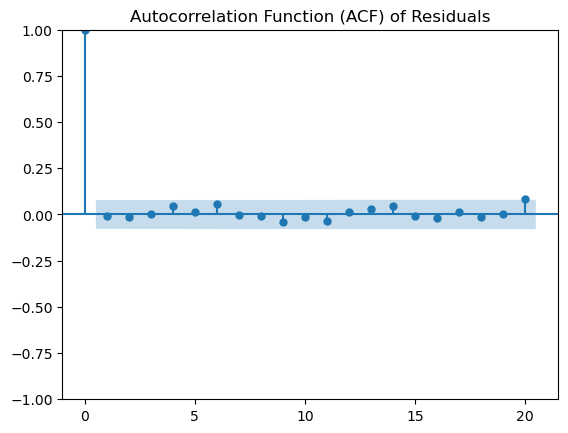

C:\Users\bro_1\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


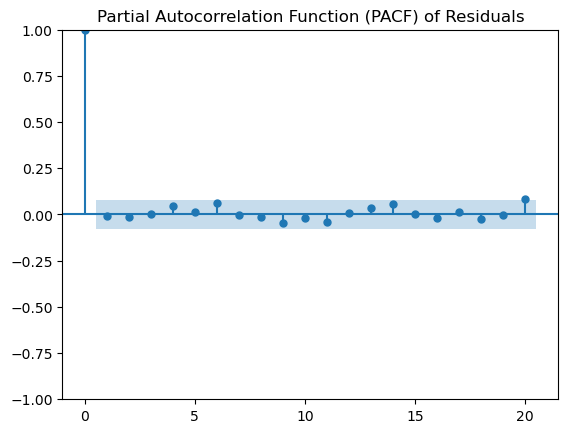

In [95]:
residuals = results_arma.resid

# Plot the residuals
plt.plot(residuals)
plt.title('Residuals of AR(1) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


# Plot ACF and PACF of residuals
plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

plot_pacf(residuals, lags=20)
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()

In [96]:
# Remove NaN values from 'Concentration' and 'FittedValues' columns
mask = ~np.isnan(data['Concentration']) & ~np.isnan(data['FittedValues'])
y_true = data['Concentration'][mask]
y_pred = data['FittedValues'][mask]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 140.51


#### Our MSE is very high, 140. that means ARIMA is not working well 

In [97]:
data.head()

,Year,Month,Day,Concentration,DayOfWeek,Weekend,FittedValues
Date,,,,,,,
2022-01-01,2022,1,1,34.826087,6,1,50.943430
2022-01-02,2022,1,2,44.717391,0,1,37.898076
2022-01-03,2022,1,3,58.812500,1,0,44.426841
2022-01-04,2022,1,4,52.604167,2,0,54.633318
2022-01-05,2022,1,5,35.173913,3,0,50.968446


## Now we calculate the lagged values of Concentration (making a new variable with the value from day before, a week before, a month before, and a year before)

In [98]:
# Assuming 'Date' is your index
data['day_lag1'] = data['Concentration'].shift(1)
data['day_lag7'] = data['Concentration'].shift(7)
data['day_lag30'] = data['Concentration'].shift(30)
data['day_lag365'] = data['Concentration'].shift(365)

# If 'Date' is not the index, you can use the following instead
# data['day_lag1'] = data['Concentration'].shift(1).reset_index(drop=True)

print(data.head())

            Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
Date                                                                            
2022-01-01  2022      1    1      34.826087          6        1     50.943430   
2022-01-02  2022      1    2      44.717391          0        1     37.898076   
2022-01-03  2022      1    3      58.812500          1        0     44.426841   
2022-01-04  2022      1    4      52.604167          2        0     54.633318   
2022-01-05  2022      1    5      35.173913          3        0     50.968446   

             day_lag1  day_lag7  day_lag30  day_lag365  
Date                                                    
2022-01-01        NaN       NaN        NaN         NaN  
2022-01-02  34.826087       NaN        NaN         NaN  
2022-01-03  44.717391       NaN        NaN         NaN  
2022-01-04  58.812500       NaN        NaN         NaN  
2022-01-05  52.604167       NaN        NaN         NaN  


In [99]:
# Columns to calculate MSE for
lag_columns = ['day_lag1', 'day_lag7', 'day_lag30', 'day_lag365']

# Create a new DataFrame for the dropped missing values
data_dropped = data.dropna()

# Loop through lag columns and calculate MSE for dropped DataFrame
for lag_column in lag_columns:
    mse_dropped = mean_squared_error(data_dropped['Concentration'], data_dropped[lag_column], squared=True)
    print(f'MSE for {lag_column} with dropped values: {mse_dropped}')

MSE for day_lag1 with dropped values: 143.68913509835645
MSE for day_lag7 with dropped values: 325.62450275835545
MSE for day_lag30 with dropped values: 622.0144939860954
MSE for day_lag365 with dropped values: 540.1895102379201


### Again very High MSE 

In [100]:
data.head()

,Year,Month,Day,Concentration,DayOfWeek,Weekend,FittedValues,day_lag1,day_lag7,day_lag30,day_lag365
Date,,,,,,,,,,,
2022-01-01,2022,1,1,34.826087,6,1,50.943430,NaN,NaN,NaN,NaN
2022-01-02,2022,1,2,44.717391,0,1,37.898076,34.826087,NaN,NaN,NaN
2022-01-03,2022,1,3,58.812500,1,0,44.426841,44.717391,NaN,NaN,NaN
2022-01-04,2022,1,4,52.604167,2,0,54.633318,58.812500,NaN,NaN,NaN
2022-01-05,2022,1,5,35.173913,3,0,50.968446,52.604167,NaN,NaN,NaN


## Now we normalize and Converge the signals (days) from euclidian to the angular domain 

In [107]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['Concentration', 'FittedValues', 'day_lag1', 'day_lag7']

# Fit and transform the selected columns
data_normalized = data.copy()  # Make a copy to avoid modifying the original data
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

# Display the normalized data
print(data_normalized)

            Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
Date                                                                            
2022-01-01  2022      1    1       0.298815          6        1      0.466547   
2022-01-02  2022      1    2       0.388855          0        1      0.327173   
2022-01-03  2022      1    3       0.517163          1        0      0.396925   
2022-01-04  2022      1    4       0.460649          2        0      0.505970   
2022-01-05  2022      1    5       0.301981          3        0      0.466815   
...          ...    ...  ...            ...        ...      ...           ...   
2023-10-06  2023     10    6       0.432985          5        0      0.382196   
2023-10-07  2023     10    7       0.518111          6        1      0.454616   
2023-10-08  2023     10    8       0.374409          0        1      0.525121   
2023-10-09  2023     10    9       0.246374          1        0      0.421333   
2023-10-10  2023     10   10

In [108]:
## Assuming data_normalized is the DataFrame with normalized columns
#data_normalized = data_normalized.copy()

# Inverse transform the selected columns
#data_normalized[columns_to_normalize] = scaler.inverse_transform(data_normalized[columns_to_normalize])

# Display the restored data
#print(data_normalized)

## Now we remove the missing values 

In [109]:
# Check for missing values in the 'Concentration' column
rows_with_missing_values = data[data['Concentration'].isna()]

# Display rows with missing values
print("Rows with missing values in 'Concentration' column:")
print(rows_with_missing_values)

Rows with missing values in 'Concentration' column:
            Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
Date                                                                            
2022-03-28  2022      3   28            NaN          1        0           NaN   
2022-03-29  2022      3   29            NaN          2        0           NaN   
2022-10-26  2022     10   26            NaN          3        0           NaN   
2022-10-27  2022     10   27            NaN          4        0           NaN   
2022-10-28  2022     10   28            NaN          5        0           NaN   
2022-10-29  2022     10   29            NaN          6        1           NaN   
2022-10-30  2022     10   30            NaN          0        1           NaN   
2022-10-31  2022     10   31            NaN          1        0           NaN   
2022-11-01  2022     11    1            NaN          2        0           NaN   
2022-11-02  2022     11    2            NaN          3   

In [110]:
# Remove rows with null values in the 'Concentration' column in-place
data_normalized.dropna(subset=['Concentration'], inplace=True)

# Display the modified data
print(data_normalized)

            Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
Date                                                                            
2022-01-01  2022      1    1       0.298815          6        1      0.466547   
2022-01-02  2022      1    2       0.388855          0        1      0.327173   
2022-01-03  2022      1    3       0.517163          1        0      0.396925   
2022-01-04  2022      1    4       0.460649          2        0      0.505970   
2022-01-05  2022      1    5       0.301981          3        0      0.466815   
...          ...    ...  ...            ...        ...      ...           ...   
2023-10-05  2023     10    5       0.346705          4        0      0.376712   
2023-10-06  2023     10    6       0.432985          5        0      0.382196   
2023-10-07  2023     10    7       0.518111          6        1      0.454616   
2023-10-08  2023     10    8       0.374409          0        1      0.525121   
2023-10-09  2023     10    9

# LSTM

In [111]:
# Assuming 'Date' is the index in data_normalized
data_normalized.reset_index(drop=True, inplace=True)

# Display the DataFrame after resetting the index
print(data_normalized)

     Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
0    2022      1    1       0.298815          6        1      0.466547   
1    2022      1    2       0.388855          0        1      0.327173   
2    2022      1    3       0.517163          1        0      0.396925   
3    2022      1    4       0.460649          2        0      0.505970   
4    2022      1    5       0.301981          3        0      0.466815   
..    ...    ...  ...            ...        ...      ...           ...   
622  2023     10    5       0.346705          4        0      0.376712   
623  2023     10    6       0.432985          5        0      0.382196   
624  2023     10    7       0.518111          6        1      0.454616   
625  2023     10    8       0.374409          0        1      0.525121   
626  2023     10    9       0.246374          1        0      0.421333   

     day_lag1  day_lag7  day_lag30  day_lag365  
0         NaN       NaN        NaN         NaN  
1    0.298815

In [112]:
data_normalized.drop(['day_lag30', 'day_lag365'], axis=1, inplace=True)

In [113]:
# Remove rows with null values in the 'day_lag1' column in-place
data_normalized.dropna(subset=['day_lag1'], inplace=True)

# Remove rows with null values in the 'day_lag7' column in-place
data_normalized.dropna(subset=['day_lag7'], inplace=True)

# Display the modified data
print(data_normalized)

     Year  Month  Day  Concentration  DayOfWeek  Weekend  FittedValues  \
7    2022      1    8       0.416362          6        1      0.388693   
8    2022      1    9       0.386118          0        1      0.428560   
9    2022      1   10       0.064100          1        0      0.408978   
10   2022      1   11       0.125067          2        0      0.147431   
11   2022      1   12       0.029774          3        0      0.160503   
..    ...    ...  ...            ...        ...      ...           ...   
622  2023     10    5       0.346705          4        0      0.376712   
623  2023     10    6       0.432985          5        0      0.382196   
624  2023     10    7       0.518111          6        1      0.454616   
625  2023     10    8       0.374409          0        1      0.525121   
626  2023     10    9       0.246374          1        0      0.421333   

     day_lag1  day_lag7  
7    0.387445  0.298815  
8    0.416362  0.388855  
9    0.386118  0.517163  
10   0.

In [114]:
data_normalized.isna().sum()

Year             0
Month            0
Day              0
Concentration    0
DayOfWeek        0
Weekend          0
FittedValues     0
day_lag1         0
day_lag7         0
dtype: int64

In [135]:
data_normalized.head()

,Year,Month,Day,Concentration,DayOfWeek,Weekend,FittedValues,day_lag1,day_lag7
7,2022,1,8,0.416362,6,1,0.388693,0.387445,0.298815
8,2022,1,9,0.386118,0,1,0.428560,0.416362,0.388855
9,2022,1,10,0.064100,1,0,0.408978,0.386118,0.517163
10,2022,1,11,0.125067,2,0,0.147431,0.064100,0.460649
11,2022,1,12,0.029774,3,0,0.160503,0.125067,0.301981


In [137]:
# Prepare data
X = data_normalized[['Year', 'Month', 'Day', 'DayOfWeek', 'Weekend', 'FittedValues', 'day_lag1', 'day_lag7']].values
y = data_normalized['Concentration'].values

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [139]:
# Reshape the input data to fit the LSTM model (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [141]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 3s 41ms/step - loss: 0.1581 - val_loss: 0.1781
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - val_loss: 0.0790
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - val_loss: 0.0381
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0325
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0395
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0425
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0411
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0405
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0402
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.040

In [142]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)

print("Test MSE:", mse)
model.compile(optimizer='adam', loss='mse')

4/4 [==============================] - 0s 2ms/step - loss: 0.0320
Test MSE: 0.03196460008621216
